# Assignment 7

## Stats & Modeling

### Step 2: Using the same Shakespeare play from your Week 6 Assignment:

- Tokenize the words, remove stopwords, stem or lemmatize the words, and calculate the word frequencies
- For the word frequencies, calculate the mean, median, mode, and trimmed mean.
    - For the trimmed mean, you can choose what to trim, but comment on the number used for trimming.
- Plot a histogram of the word frequency data and comment on the relative locations of the mean, median, mode, and trimmed mean
- Calculate the standard deviation and the interquartile range (the difference of the 75% and 25% quantile)
    - Comment as well on how they compare to each other and to the histogram plot.

In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.collocations import *
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
response = requests.get('https://www.gutenberg.org/ebooks/1531.txt.utf-8')
response

<Response [200]>

In [3]:
# Save all the html in a string variable
html_string = response.text
othello = html_string.lower()

# Use BeautifulSoup to create a new object that will allow you to search for HTML tags
document = BeautifulSoup(othello, "html.parser")
#document
#html_string

In [4]:
sent = sent_tokenize(othello)

In [5]:
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)

In [6]:
myStopWords = list(punctuation + '’') + stopwords.words('english')
wordsNoStop = []
for i in words:
    if i not in myStopWords:
        wordsNoStop.append(i)
#print(words)
#print(wordsNoStop)

In [7]:
wordsNoStopComp = [w for w in words if w not in myStopWords]
#print(wordsNoStopComp)

In [8]:
othellostemmed = [WordNetLemmatizer().lemmatize(w) for w in wordsNoStopComp]

In [9]:
othellofreq = FreqDist(othellostemmed)

In [10]:
from collections import Counter
Counter = Counter(othellofreq)
most_occur = Counter.most_common(20)
df = pd.DataFrame({'wordfreq':most_occur})
df

,wordfreq
0,"(iago, 353)"
1,"(othello, 337)"
2,"(cassio, 248)"
3,"(desdemona, 223)"
4,"(thou, 143)"
5,"(emilia, 129)"
6,"(come, 106)"
7,"(shall, 100)"
8,"(roderigo, 98)"
9,"(work, 95)"


In [11]:
#see least common values

#from collections import Counter
#Counter = Counter(othellofreq)
#least_occur = Counter.most_common()[:-50-1:-1]
#df2 = pd.DataFrame({'wordfreq':least_occur})
#df2

In [12]:
df = pd.DataFrame({'wordfreq':othellofreq})
df = df.sort_values(by='wordfreq').copy()
df

,wordfreq
﻿the,1
grievously,1
grievous,1
grieving,1
grievance,1
...,...
thou,143
desdemona,223
cassio,248
othello,337


In [13]:
df["wordfreq"].mean()

4.214641826292311

In [14]:
df['wordfreq'].median()

1.0

In [15]:
df['wordfreq'].mode()

0    1
dtype: int64

In [16]:
#double check
df['wordfreq'].describe()

count    3811.000000
mean        4.214642
std        13.080835
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       353.000000
Name: wordfreq, dtype: float64

In [17]:
# Calculae 10% trimmed mean, meaning the smallest 10% and largest 10% of values have been removed
from scipy import stats
trimmedMean = stats.trim_mean(df.wordfreq, 0.1) 
trimmedMean

1.9724499836011806

This was an attempt to remove many of the words that only show up once as well as some of the words like character names that show up hundreds of times. By removing such words, we can try to get a better spread in our frequency data that is not as skewed. The removal of words that appear just once do not change the mean as much as the character names. The character names impact the mean quite a bit as their frequencies go up in the hundreds. This explains why our trimmed mean is smaller.

<AxesSubplot:title={'center':'Word Frequencies in Othello'}, ylabel='Frequency'>

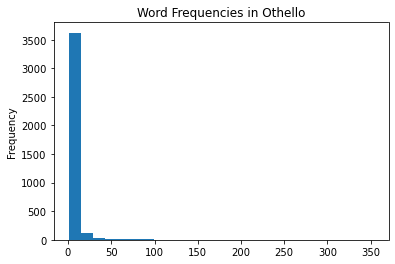

In [18]:
df['wordfreq'].plot(kind="hist", y="wordfreq", bins = 25, title='Word Frequencies in Othello')

We can see that most of our word frequency values are below 100 which makes sense as in Assignment 6 we say that only about 8 terms appeared in Othello more than 100 times. Looking closer at our histogram, we can see that most word frequency values are close to the value of 0, thus implying that many words were used only once or a couple times in the text. As a result, our mean value of 4.21 does make sense, but may be a bit high due to the 8 or so words that appear more than 100 times. The median of 1 also makes sense to be found close to the left side of the plot as the majority of words in the text appear just once compared to words that appear multiple times, and this also explains the mode's value of 1 as well. by removing the smallest 10% and largest 10% of values for the trimmed mean, we remove many of the words that appear over 100 times but we don't really remove many of the words that appear just once since the number of words that have a frequency of 1 is well beyond 50. As a result, our trimmed mean value of 1.97 is closer to our median and mode value which again makes sense for our data.

In [19]:
df['wordfreq'].std()

13.08083512253372

In [20]:
df['wordfreq'].quantile(0.25)

1.0

In [21]:
df['wordfreq'].quantile(0.75)

3.0

In [22]:
#interquartile range
df['wordfreq'].quantile(0.75) - df['wordfreq'].quantile(0.25)

2.0

The standard deviation is 13.1 which is high but makes sense because of how varied our frequency values become towards the words with the highest values. This is also shown by how positively skewed our histrogram plot is. Our interquartile range is 2 which is close to both the median and mode. This makes sense because of how many of the 3811 words have a frequency value of 1 compared to those with higher values.

### Step 3: Foray into machine learning

- Import scikit-learn's example diabetes dataset as a Panda's dataframe with the following code:
    - from sklearn import datasets
    - df = datasets.load_diabetes(as_frame=True) 
    - features_df = df.data
    - target_df = df.target
- Use the following code to view a description of the dataset:
    - print(df.DESCR)
- Do some exploratory data analysis of the features, including getting summary statistical information
- Find the column in features_df that has the highest correlation coefficient with the target values in target_df
- Make a scatter plot of the target values vs this feature column's values and comment on how the plotted points match up with the correlation coefficient
- Using this feature and target, perform linear regression with sklearn's LinearRegression
- Print the coefficients of the model
- Plot the linear fit on top of the scatter plot
- Calculate (or output) the mean squared error and R-squared values for your fit
- Try doing linear regression with another variable and check how the new fit's mean squared error and R-squared values change.

In [23]:
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True)
features_df = df.data
target_df = df.target

In [24]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [25]:
features_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [26]:
target_df

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [27]:
for i in features_df.columns:
    corrcoef = np.corrcoef(features_df[i], target_df)
    print("correlation coefficient of " + i + " is " + str(corrcoef))

correlation coefficient of age is [[1.         0.18788875]
 [0.18788875 1.        ]]
correlation coefficient of sex is [[1.       0.043062]
 [0.043062 1.      ]]
correlation coefficient of bmi is [[1.         0.58645013]
 [0.58645013 1.        ]]
correlation coefficient of bp is [[1.         0.44148385]
 [0.44148385 1.        ]]
correlation coefficient of s1 is [[1.         0.21202248]
 [0.21202248 1.        ]]
correlation coefficient of s2 is [[1.         0.17405359]
 [0.17405359 1.        ]]
correlation coefficient of s3 is [[ 1.         -0.39478925]
 [-0.39478925  1.        ]]
correlation coefficient of s4 is [[1.         0.43045288]
 [0.43045288 1.        ]]
correlation coefficient of s5 is [[1.         0.56588343]
 [0.56588343 1.        ]]
correlation coefficient of s6 is [[1.         0.38248348]
 [0.38248348 1.        ]]


bmi has the highest correlation coefficient with the target values in taget_df

<AxesSubplot:title={'center':'target values vs bmi values'}, xlabel='bmi', ylabel='targets'>

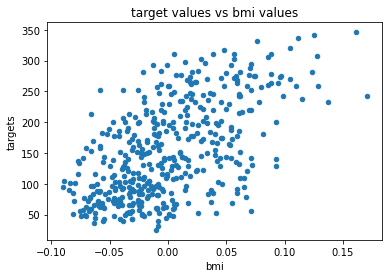

In [32]:
data2 = {'bmi':features_df['bmi'], 'targets':target_df}
#data2
df2 = pd.DataFrame(data2)
df2.plot(kind = 'scatter', x = 'bmi', y = 'targets', title = 'target values vs bmi values')

The plotted points on the scatter plot show a relatively positive trend which matches the correlation coefficient value of 0.59 between the target values and the bmi values. However, we do see stray points as well as many points that do not create a perfect positive trend on the y = x line that prevent the correlation from being 1.

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(features_df[["bmi"]], target_df)
print(reg.coef_)

[949.43526038]


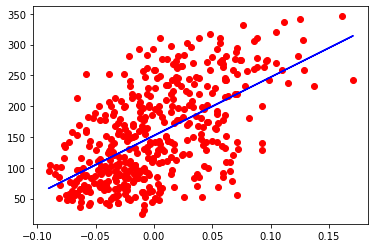

In [35]:
import matplotlib.pyplot as plt
ytrain = reg.intercept_ + reg.coef_ * features_df["bmi"]
plt.plot(features_df["bmi"],target_df,'ro',features_df["bmi"],ytrain,'b-')

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# mean squared error
print(mean_squared_error(target_df,ytrain))

3890.4565854612724


In [40]:
# r squared values
print(r2_score(target_df, ytrain))

0.3439237602253803


<AxesSubplot:title={'center':'target values vs s3 values'}, xlabel='s3', ylabel='targets'>

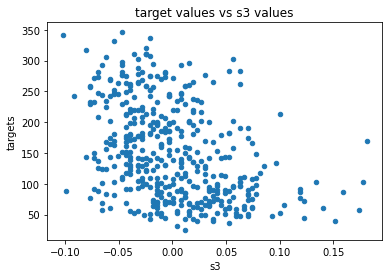

In [41]:
data3 = {'s3':features_df['s3'], 'targets':target_df}
#data3
df3 = pd.DataFrame(data3)
df3.plot(kind = 'scatter', x = 's3', y = 'targets', title = 'target values vs s3 values')

In [42]:
reg2 = LinearRegression().fit(features_df[["s3"]], target_df)
print(reg2.coef_)

[-639.14527932]


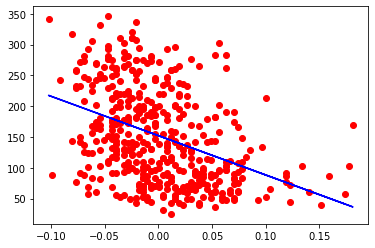

In [43]:
ytrain2 = reg2.intercept_ + reg2.coef_ * features_df["s3"]
plt.plot(features_df["s3"],target_df,'ro',features_df["s3"],ytrain2,'b-')

In [44]:
# mean squared error
print(mean_squared_error(target_df,ytrain2))

5005.661620710653


In [45]:
# r squared values
print(r2_score(target_df, ytrain2))

0.1558585524453051


I chose to use s3 as it had the lowest correlation coefficient with the target values. The mean squared error is much higher while the r squared value is lower compared to the last fit.